In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

In [25]:
# df=pd.read_csv('d1.csv')
# fd=pd.read_csv('d2.csv')

In [27]:
# # prompt: drop score column from df

# df = df.drop('score', axis=1)
# df.head()


,Titles,genre,Director,Actors,Rating
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",8.1
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",7.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",7.3
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",7.2
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",6.2


In [28]:

# # Combine 'star1', 'star2', 'star3', and 'star4' columns into a single 'actors' column in fd
# fd['Actors'] = fd['Star1'].astype(str) + ',' + fd['Star2'].astype(str) + ',' + fd['Star3'].astype(str) + ',' + fd['Star4'].astype(str)

# # Display the first few rows of the modified fd DataFrame
# fd.head()

,Titles,genre,Rating,score,Director,Star1,Star2,Star3,Star4,Actors
0,The Shawshank Redemption,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"Tim Robbins,Morgan Freeman,Bob Gunton,William ..."
1,The Godfather,"Crime, Drama",9.2,96.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"Marlon Brando,Al Pacino,James Caan,Diane Keaton"
2,The Dark Knight,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich..."
3,The Godfather: Part II,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"Al Pacino,Robert De Niro,Robert Duvall,Diane K..."
4,12 Angry Men,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie..."


In [29]:
# l=['Titles','genre','Rating','Director','Actors']
# fd=fd[l]

In [30]:
# fd = fd.reindex(columns=['Titles', 'genre', 'Director', 'Actors', 'Rating'])
# fd.head()

,Titles,genre,Director,Actors,Rating
0,The Shawshank Redemption,Drama,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",9.3
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando,Al Pacino,James Caan,Diane Keaton",9.2
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",9.0
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",9.0
4,12 Angry Men,"Crime, Drama",Sidney Lumet,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",9.0


In [34]:
# combined_df = pd.concat([df, fd], ignore_index=True)

In [37]:
# combined_df.to_csv('combined_df.csv', index=False)

In [38]:
df=pd.read_csv('combined_df.csv')

In [39]:
df.shape

(2000, 5)

In [40]:
df.duplicated().sum()

0

In [41]:
df.isnull().sum()

,0
Titles,0
genre,0
Director,0
Actors,0
Rating,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Titles    2000 non-null   object 
 1   genre     2000 non-null   object 
 2   Director  2000 non-null   object 
 3   Actors    2000 non-null   object 
 4   Rating    2000 non-null   float64
dtypes: float64(1), object(4)
memory usage: 78.2+ KB


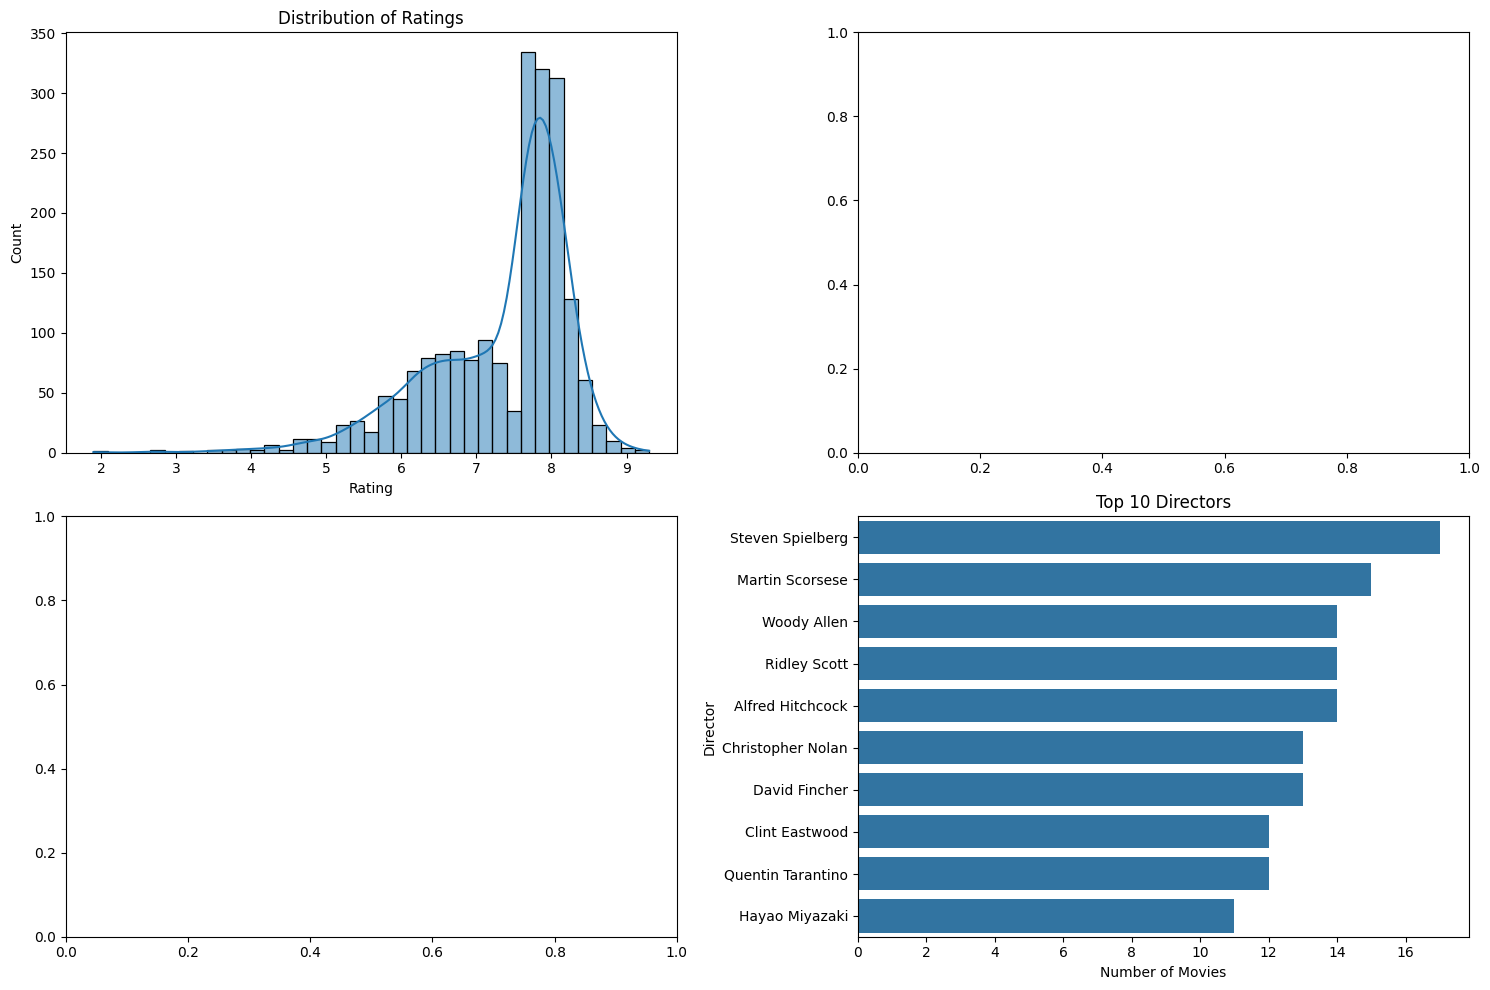

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


sns.histplot(df['Rating'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Ratings')

top_directors = df['Director'].value_counts().nlargest(10)
sns.barplot(y=top_directors.index, x=top_directors.values, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Directors')
axes[1, 1].set_xlabel("Number of Movies")

plt.tight_layout()
plt.show()

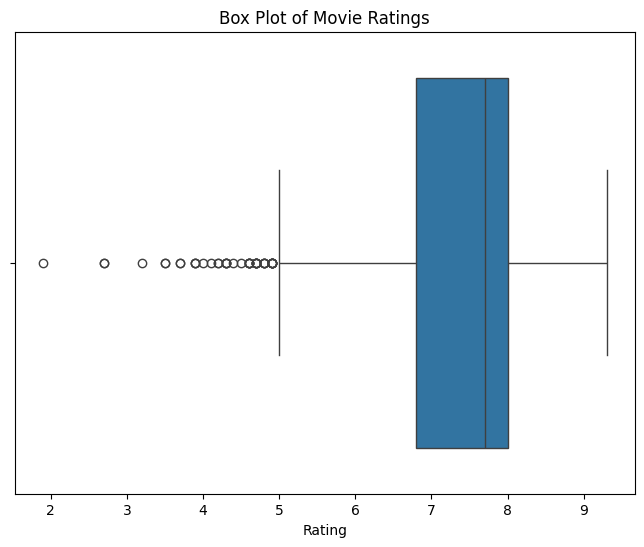

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', data=df)
plt.title('Box Plot of Movie Ratings')
plt.show()

In [49]:
user_item_matrix = df.pivot_table(index='Director', columns='Titles', values='Rating')
user_item_matrix = user_item_matrix.fillna(0)

def get_recommendations(director_name, user_item_matrix, num_recommendations=5):
    if director_name not in user_item_matrix.index:
        return "Director not found in the dataset."

    similarity_scores = cosine_similarity(user_item_matrix.loc[[director_name]], user_item_matrix)
    similar_directors = list(enumerate(similarity_scores[0]))
    sorted_directors = sorted(similar_directors, key=lambda x: x[1], reverse=True)[1:]

    recommendations = []
    for i, score in sorted_directors:
        director = user_item_matrix.index[i]
        movies = user_item_matrix.loc[director].sort_values(ascending=False).index[:num_recommendations]
        recommendations.extend(movies.tolist())
        if len(recommendations) >= num_recommendations:
            break

    return recommendations[:num_recommendations]


In [50]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_matrix = train_data.pivot_table(index='Director', columns='Titles', values='Rating').fillna(0)
test_matrix = test_data.pivot_table(index='Director', columns='Titles', values='Rating').fillna(0)

def evaluate_model(train_matrix, test_matrix, k=5):
    predictions = []
    actual = []

    for director in test_matrix.index:
        if director in train_matrix.index:
            recommendations = get_recommendations(director, train_matrix, k)

            for movie in recommendations:
                if movie in test_matrix.columns:
                    predictions.append(train_matrix.loc[director][movie])
                    actual.append(test_matrix.loc[director][movie])

    mse = mean_squared_error(actual, predictions)
    rmse = mse**0.5

    print(f"RMSE: {rmse}")

In [51]:
recommendations = get_recommendations('James Gunn', user_item_matrix)
print(f"Recommendations: {recommendations}")
evaluate_model(train_matrix, test_matrix)

Recommendations: ['Taare Zameen Par', '(500) Days of Summer', 'Smultronstället', 'Slither', 'Sling Blade']
RMSE: 0.007516460280028262
